## Lab 4: Choropleth mapping

This week we are going to talk about using Python to create choropleth map. We will map the blood lead distribution in Philadelphia. 

We need to have new module of mapclassify, please just type in `pip install mapclassify` in your terminal.
If you have no pip installed, then you can run `conda install -c anaconda pip` in the anaconda terminal to install `pip`. If you meet the error of `module 'brotli' has no attribute 'error'`, you can type in `conda install -c anaconda urllib3` in the Anaconda terminal. 

### Explore pandas and Geopandas dataframes
Import geopandas. Geopandas can read almost any vector-based spatial data format including ESRI shapefile using read_file command which returns a GeoDataframe object.

In [1]:
import geopandas as gpd

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

city_bound = gpd.read_file('data/City_Limits.shp')
# print the first 5 records of the dataframe, used to check the data structure
blood_lead_gdf.head()


,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."


#### Descriptive analysis of the data

In [2]:

print(blood_lead_gdf['perc_5plus'].min()) # print the min value of the blood lead records for each neighborhood
print('The mas value is:', blood_lead_gdf['perc_5plus'].max()) # print the max value
print('The mean value is:', blood_lead_gdf['perc_5plus'].mean()) #print the mean value of all neighborhoods
print(blood_lead_gdf['perc_5plus'].describe()) # a general discription of the blood lead for all neighborhoods


0.0
The mas value is: 17.6
The mean value is: 5.8586614173228355
count    254.000000
mean       5.858661
std        3.939310
min        0.000000
25%        3.225000
50%        5.700000
75%        8.475000
max       17.600000
Name: perc_5plus, dtype: float64


In [3]:
blood_lead_gdf

,census_tra,data_redac,num_bll_5p,num_screen,perc_5plus,geometry
0,42101000100,0,0.0,100.0,0.0,"POLYGON ((-75.14147 39.95171, -75.14150 39.951..."
1,42101000200,1,NaN,109.0,NaN,"POLYGON ((-75.16238 39.95765, -75.16236 39.957..."
2,42101000300,1,NaN,110.0,NaN,"POLYGON ((-75.17820 39.95981, -75.17743 39.959..."
3,42101000401,1,NaN,61.0,NaN,"POLYGON ((-75.17299 39.95464, -75.17301 39.954..."
4,42101000402,0,0.0,41.0,0.0,"POLYGON ((-75.16333 39.95334, -75.16340 39.953..."
...,...,...,...,...,...,...
375,42101980200,1,NaN,NaN,NaN,"POLYGON ((-75.05636 40.08766, -75.05644 40.087..."
376,42101980700,1,NaN,NaN,NaN,"POLYGON ((-75.13515 39.92863, -75.13443 39.926..."
377,42101980800,1,NaN,NaN,NaN,"POLYGON ((-75.25593 39.97813, -75.25566 39.976..."
378,42101980900,1,NaN,NaN,NaN,"POLYGON ((-75.20165 39.93757, -75.20127 39.937..."


### check the projection of the dataframes

In [4]:
print('the projection of the city boundary is:', city_bound.crs)
print('the blood lead data projection is:', blood_lead_gdf.crs)

the projection of the city boundary is: epsg:4326
the blood lead data projection is: epsg:4326


### Create a choropleth map
You can select the color bar from, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html.



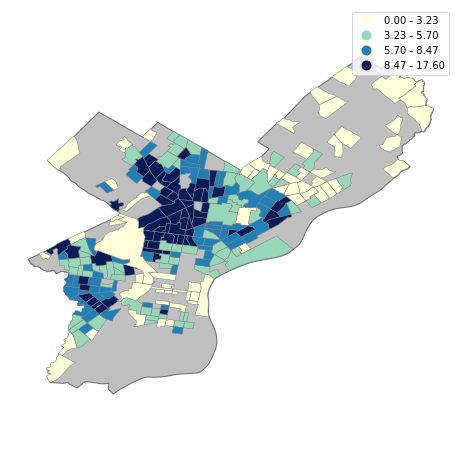

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# read the blood lead data
blood_lead_shp = r'data/child_blood_lead_levels_by_ct.shp'
blood_lead_gdf = gpd.read_file(blood_lead_shp)

# read the city limit file
city_bound = gpd.read_file('data/City_Limits.shp')

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=n_class, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'

ax.set_axis_off()
plt.axis('equal')
plt.show()


### Change the display projection and relocate legend.
Great! We just created our first choropleth map using Python. However, the map looks flattened, let's make it looks better by changing the display projection.

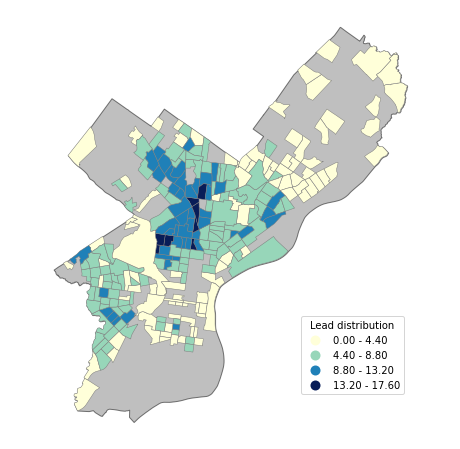

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4


# change the projection to local projection of Philadelphia
blood_lead_gdf_phily = blood_lead_gdf.to_crs(epsg=2272) #
city_bound_phily = city_bound.to_crs(epsg=2272)

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column='perc_5plus', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         legend_kwds={'title': 'Lead distribution'}, #title of the legend
                         k=n_class, #the number of classes
                         scheme='equal_interval') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'

# relocate the legend to bottom right
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.7, 0.1, 0.2, 0.2)) #(left, bottom, width, height)

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)


plt.show()

The new map looks much better. However, you may not satisify with the circle legends. Let's make a better legend. 

### Using more appealing legend for your map

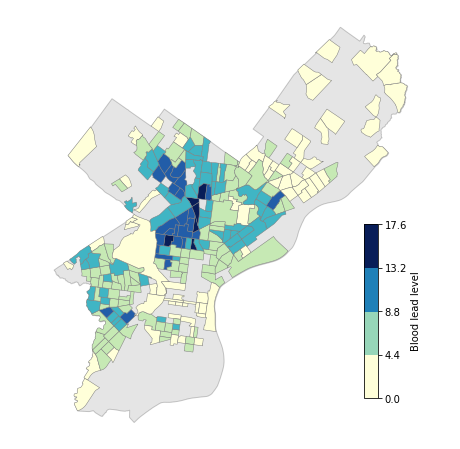

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a plot for the choropleth map
f, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# set the color scheme
cmap = plt.cm.get_cmap('YlGnBu', n_class)


# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.2, color='grey', edgecolor='k')

# set the location of the legend
axins = ax.inset_axes([0.8, 0.1, 0.03, 0.4]) #x0, y0, width, height

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         scheme='equal_interval')


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.EqualInterval(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# create a color bar for the map
norm = Normalize(vmin=blood_lead_gdf_phily[field].min(), vmax=blood_lead_gdf_phily[field].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)

cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='vertical', 
                                cax = axins,
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

# cbar = ax.get_figure().colorbar(n_cmap, orientation='horizontal', fraction=0.046, pad=0.0, shrink=0.2)
cbar.ax.set_ylabel('Blood lead level')

ax.set_axis_off()
plt.axis('equal')

# save the geoviz into a png file locally
plt.savefig("PhiladelphiaBloodLead.png", bbox_inches='tight', pad_inches=0.1, dpi=1000)

plt.show(f)


### Make the legend horizontal

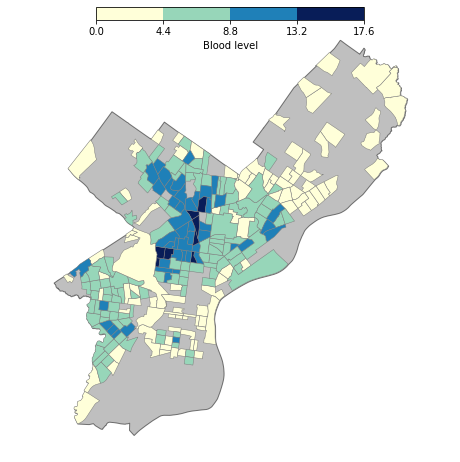

In [8]:
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='equal_interval') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.EqualInterval(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max())
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar

n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)
cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

### Using Nature break to create choropleth map

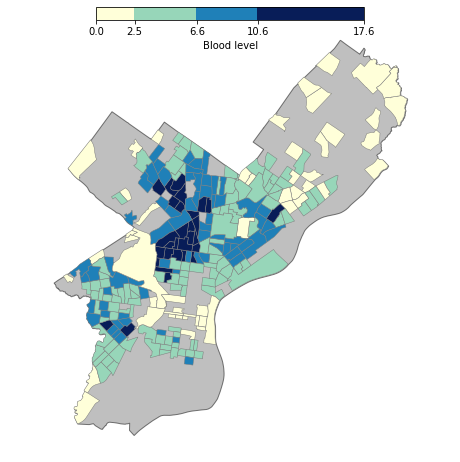

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height

# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional',  #let the distance in legend proportional to the value
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

### Set the distance in the color bar equal

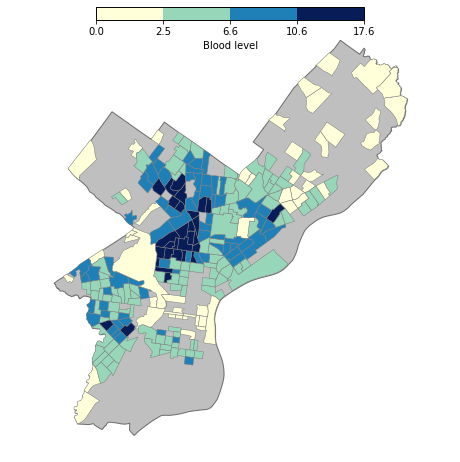

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from matplotlib import cm
import mapclassify as mc


# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

# the number of categories
n_class = 4

# get the color bar, the string for color can be found here, https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
cmap = plt.cm.get_cmap('YlGnBu', n_class)

# plot the city limit as the background
city_bound_phily.plot(ax=ax, alpha=0.5, color='grey', edgecolor='k')

# the field to plot the choropleth map
field = 'perc_5plus'

# plot the choropleth map of blood lead in Philadelphia
blood_lead_gdf_phily.plot(column=field, 
                     cmap='YlGnBu', 
                     edgecolor='0.5', 
                     ax = ax,
                     linewidth=0.5,
#                      legend=True, #don't use the legend
                     k=n_class, #the number of classes
                     scheme='NaturalBreaks') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


# the function should be matched with the scheme of the above geopandas plot, https://pysal.org/mapclassify/_modules/mapclassify/classifiers.html
nb = mc.NaturalBreaks(blood_lead_gdf[field].dropna(), k=n_class) # NaturalBreaks, FisherJenks, quantile
vals = list(nb.bins) #get the interval labels
vals.insert(0, blood_lead_gdf[field].min())


# set the location of the legend
axins = ax.inset_axes([0.2, 1., 0.6, 0.03]) #x0, y0, width, height


# # create a color bar for the map
# norm = Normalize(vmin=blood_lead_gdf[field].min(), vmax=blood_lead_gdf[field].max(), clip=True)
norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
n_cmap = cm.ScalarMappable(norm=norm, cmap=cmap)
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
                                spacing='proportional', 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

norm = mpl.colors.BoundaryNorm(vals, cmap.N) #discrete color bar
cbar = ax.get_figure().colorbar(n_cmap, 
                                orientation='horizontal', 
                                cax=axins,
#                                 spacing='proportional', # let the distance 
                                fraction=0.046, 
                                pad=0.0, 
                                ticks=vals,
                                shrink=0.4)

cbar.ax.set_xlabel('Blood level')


ax.set_axis_off()
plt.axis('equal')
plt.show()

## Lab 4: Homework：
1. Using the same dataset (Blood lead distribution of Philadelphia), plot the map for the records of `num_bll_5p`. You can also make choropleth map for other datasets you can find. 

2. Using the other palettee you think is beautiful. Different from the one I used. You can find more palettee from https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

3. Using the NaturalBreaks method as the scheme (make sure the legend and the map are the same).

3. Save the plot as a png file with dpi of 200. Upload both png file and ipynb file to canvas.


## Reference:
1. Mapping using GeoPandas, https://geopandas.readthedocs.io/en/latest/mapping.html
2. Gallery of GeoPandas Mapping, https://geopandas.readthedocs.io/en/latest/gallery/index.html